In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import matplotlib.gridspec as gridspec
from scipy.signal import butter, lfilter
from sklearn import decomposition

import mne

import os


import glob

from utils import *

from time import sleep

In [2]:
foldername = '../../../Originals/procesados/'

In [3]:
filenames = sorted(os.listdir(foldername))

In [5]:
eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[0])

In [6]:
print("Sampling rate: {:.2f} Hz".format(s_rate))
print("Data shape: {:d} samples x {:d} channels".format(n_samples, n_channels))
print("Tiempo total : {:.2f} ".format(n_samples/s_rate))

Sampling rate: 256.00 Hz
Data shape: 7681 samples x 30 channels
Tiempo total : 30.00 


In [7]:
mont1020 = Mont1020()

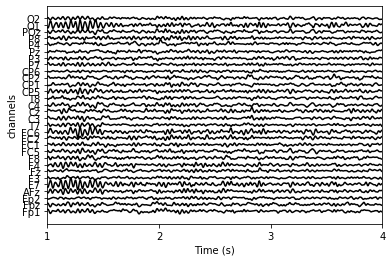

In [8]:
fig, ax = plt.subplots()
plot_eeg_data(ax, eeg_data=eeg_data,
              ch_names=mont1020.get_ch_names(),
              start=1, end=4)

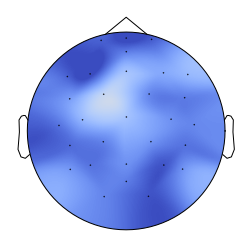

In [9]:
sujeto = filenames[0].split("_")[1]
plot_topology(eeg_data=eeg_data, 
              info_eeg=mont1020.get_info_eeg(),
              sujeto=sujeto, title='Test')
plt.show()

In [10]:
eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data)

In [11]:
plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg())

TypeError: plot_pca_eeg_data() missing 1 required positional argument: 'sujeto'

# Abrir los archivos .TXT. Visualizar las series temporales para cada canal.

# Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?

# Calcular las componentes principales para el total de los datos (concatenados en el tiempo). ¿Qué peso tiene cada proyección en los distintos períodos de reposo?

## Sujeto 9: No se nota tanta diferencia entre los 2 estados de reposo.
## Sujeto 8: Se nota diferencias entre los 2 estados de reposo.
## Sujeto 13: No se nota tanta diferencia entre los 2 estados de reposo.
## Sujeto 10: Se nota diferencias entre los 2 estados de reposo.
## Sujeto : Se nota diferencias entre los 2 estados de reposo.

## Plot de pre y post aprendisaje

### Graficar los promedios de la topografía para cada participante. ¿Hay diferencias entre los dos períodos de reposo?

Gráfica serie de tiempo



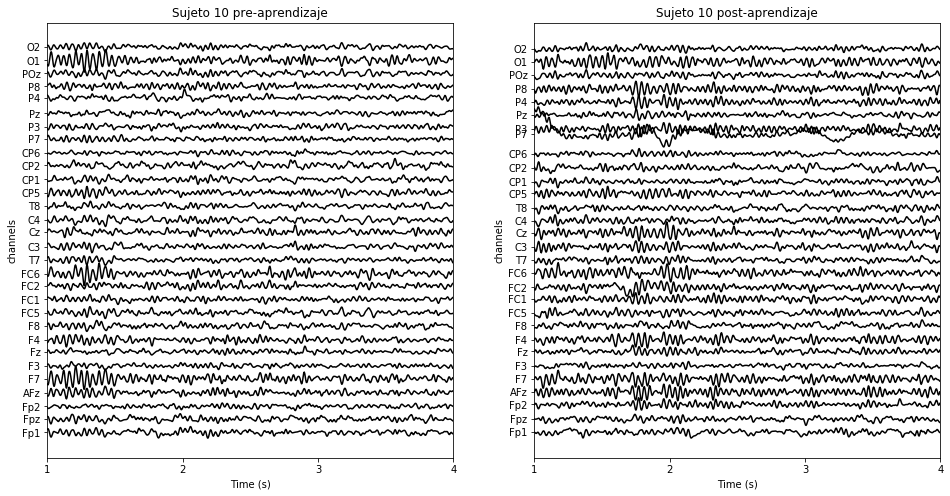




Gráfica topología EEG sujeto 10 pre-aprendizaje



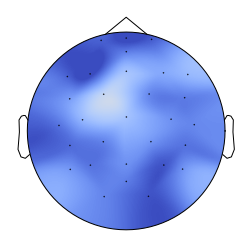

Gráfica topología EEG sujeto 10 post-aprendizaje



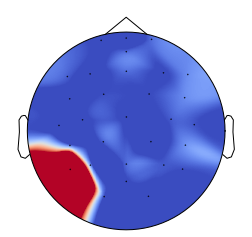







Gráfica serie de tiempo



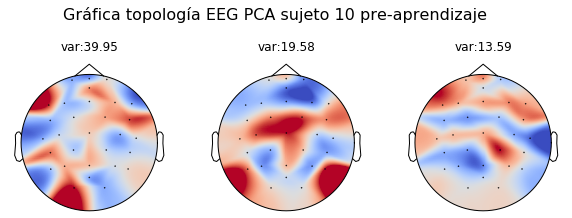

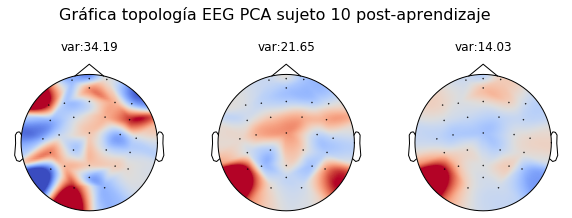

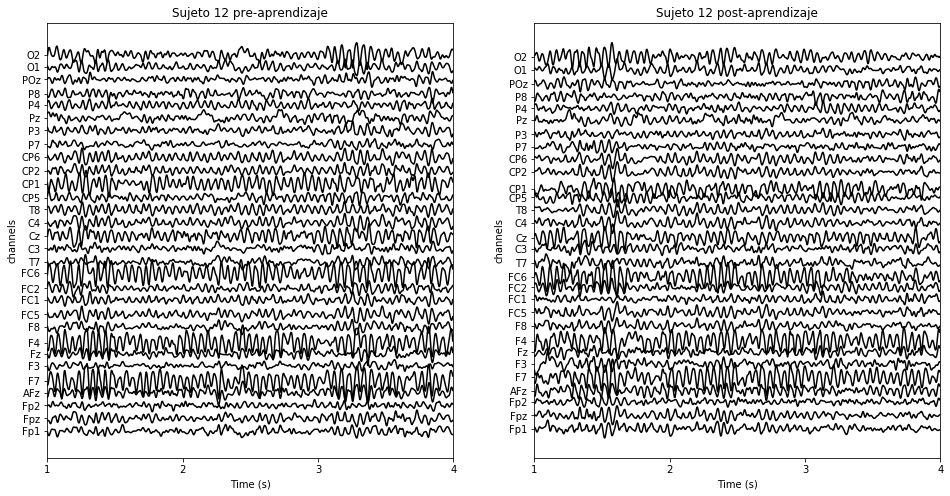




Gráfica topología EEG sujeto 12 pre-aprendizaje



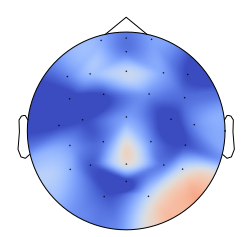

Gráfica topología EEG sujeto 12 post-aprendizaje



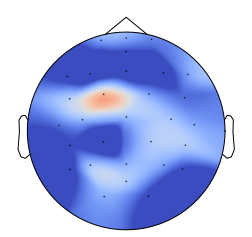







Gráfica serie de tiempo



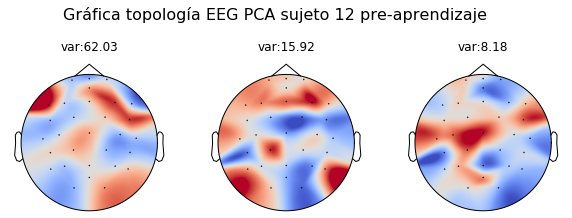

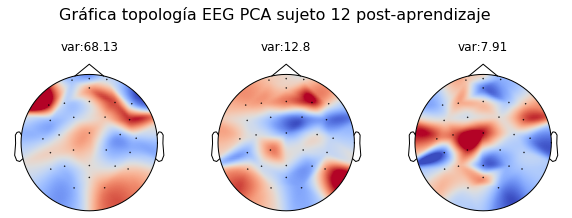

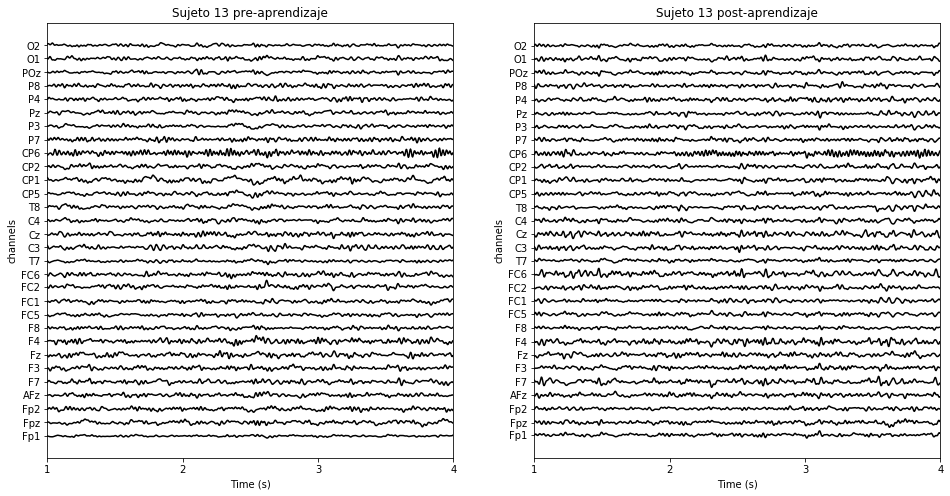




Gráfica topología EEG sujeto 13 pre-aprendizaje



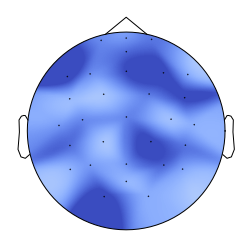

Gráfica topología EEG sujeto 13 post-aprendizaje



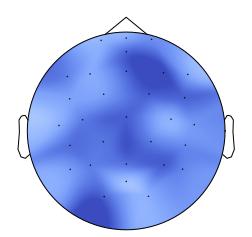







Gráfica serie de tiempo



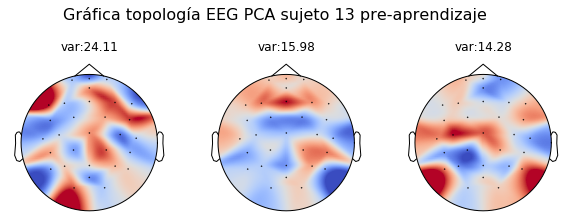

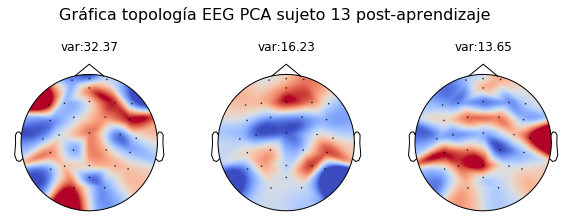

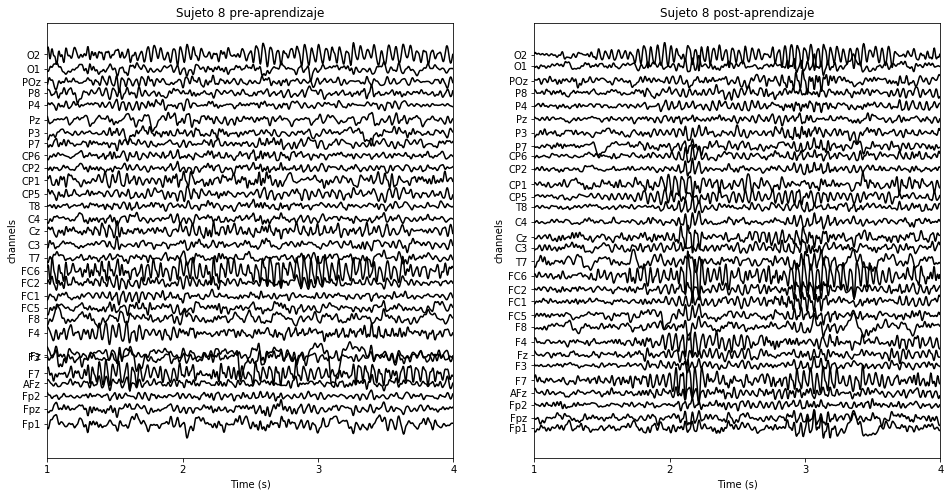




Gráfica topología EEG sujeto 8 pre-aprendizaje



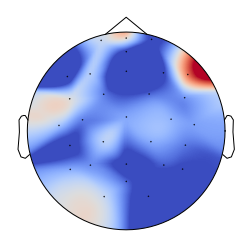

Gráfica topología EEG sujeto 8 post-aprendizaje



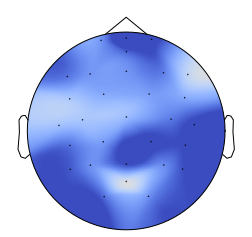







Gráfica serie de tiempo



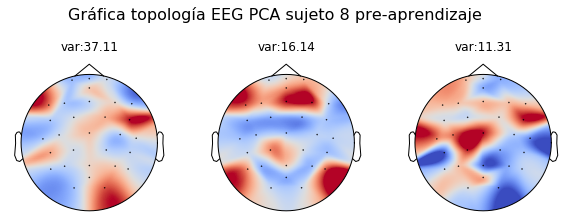

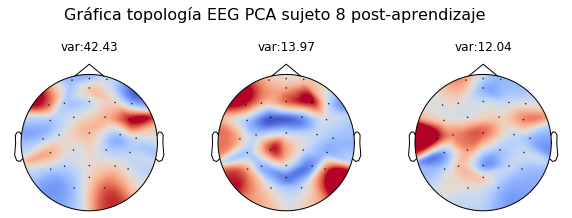

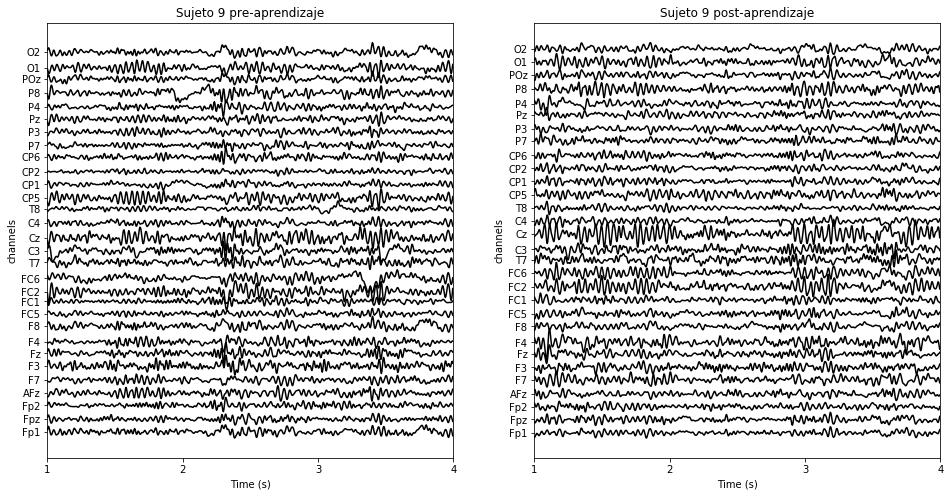




Gráfica topología EEG sujeto 9 pre-aprendizaje



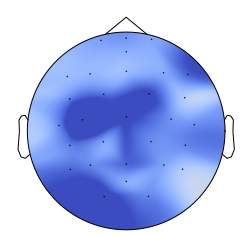

Gráfica topología EEG sujeto 9 post-aprendizaje



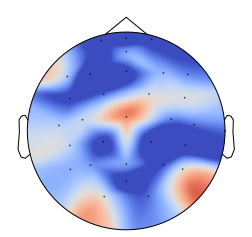

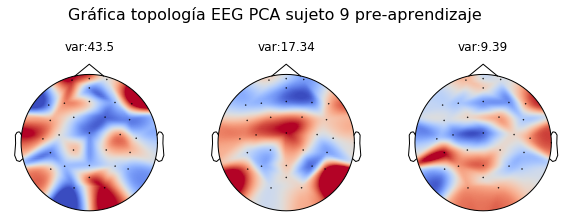

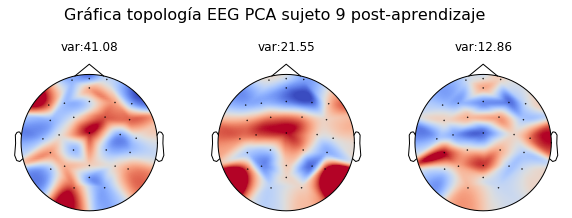

In [12]:
for i in range(0,len(filenames),2):
    #print(f'Analizando el archivo {filenames[i]}\n\n')
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i])    
    print('Gráfica serie de tiempo\n')
    plot_eeg_data(axes[0], eeg_data, ch_names=mont1020.get_ch_names())

    eeg_data_1, s_rate_1, n_channels_1, n_samples_1 = get_egg_data(foldername + filenames[i+1])
    plot_eeg_data(axes[1], 
                  eeg_data_1, 
                  ch_names=mont1020.get_ch_names())
    sujeto = filenames[i].split("_")[1]
    axes[0].title.set_text(f'Sujeto {sujeto} pre-aprendizaje')
    axes[1].title.set_text(f'Sujeto {sujeto} post-aprendizaje')
    
    plt.savefig(f'../images/grafica_ts_sujeto_{sujeto}.png')
    plt.show()
    
    print('\n\n')    
    print(f'Gráfica topología EEG sujeto {sujeto} pre-aprendizaje\n')
    fig = plot_topology(eeg_data=eeg_data, info_eeg=mont1020.get_info_eeg(), 
                        sujeto=f"{sujeto}_pre", title=f'Gráfica topología EEG sujeto {sujeto} pre-aprendizaje')
    plt.show()
    print(f'Gráfica topología EEG sujeto {sujeto} post-aprendizaje\n')
    fig = plot_topology(eeg_data=eeg_data_1, info_eeg=mont1020.get_info_eeg(), 
                        sujeto=f"{sujeto}_post", title=f'Gráfica topología EEG sujeto {sujeto} post-aprendizaje')
    plt.show()
    
    
    print('\n\n')
    eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data)
    tt = f'Gráfica topología EEG PCA sujeto {sujeto} pre-aprendizaje \n\n'
    plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg(), 
                      title=tt, sujeto=f'{sujeto}_pre')
#     plt.savefig(f'../images/grafico_pca_sujeto_{sujeto}_pre')
    
    tt = f'Gráfica topología EEG PCA sujeto {sujeto} post-aprendizaje \n\n'
    eeg_data_pca_1, variance_ratio = get_pca_eeg_data(eeg_data_1)
    plot_pca_eeg_data(eeg_data_pca_1, variance_ratio, mont1020.get_info_eeg(),
                      title=tt, sujeto=f'{sujeto}_post')
#     plt.savefig(f'../images/grafico_pca_sujeto_{sujeto}_post')
#     plt.show()
    print('\n\n')

## Comparar las componentes principales para estudiar las posibles fuentes de variabilidad de los datos.
Opción 1: comparar entre condiciones. Calcular las componentes principales
(n=3) para cada condición de registro (pre y post) concatenando los datos de los 5
participantes en el tiempo. ¿Son diferentes las topologías para ambas condiciones?




Gráfica topología EEG Data filtrada PCA pre

Gráfica topología EEG Data filtrada PCA pos






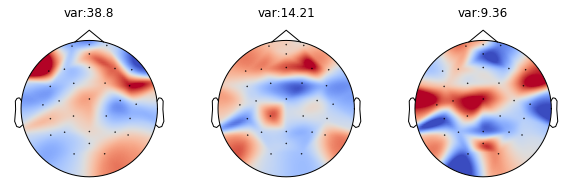

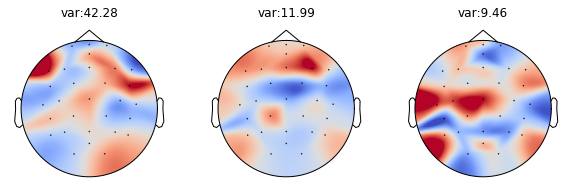

In [15]:
eeg_data_list_bl1 = []
eeg_data_list_bl2 = []

for i in range(0,len(filenames),2):
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i])
    eeg_data_1, s_rate_1, n_channels_1, n_samples_1 = get_egg_data(foldername + filenames[i+1])
    eeg_data_list_bl1 += [eeg_data]
    eeg_data_list_bl2 += [eeg_data_1]

eeg_data_pre = np.concatenate(eeg_data_list_bl1,axis=1)
eeg_data_pos = np.concatenate(eeg_data_list_bl2,axis=1)

print('\n\n')
print('Gráfica topología EEG Data filtrada PCA pre\n')
eeg_data_pca, variance_ratio = get_pca_eeg_data(eeg_data_pre)
plot_pca_eeg_data(eeg_data_pca, variance_ratio, mont1020.get_info_eeg(),
                 title='', sujeto=f'{sujeto}_pre')
print('Gráfica topología EEG Data filtrada PCA pos\n')
eeg_data_pca_1, variance_ratio = get_pca_eeg_data(eeg_data_pos)
plot_pca_eeg_data(eeg_data_pca_1, variance_ratio, mont1020.get_info_eeg(),
                 title='', sujeto=f'{sujeto}_post')


print('\n\n')  

# Referenciar los datos al promedio por sample. Que quiere decir esto???

# Calcular el Campo de Potencia Global (GFP, [1])

In [4]:
from scipy.signal import find_peaks
import numpy as np

In [15]:
df.shape

(30, 1001)

In [22]:
df.shape

(30, 7681)

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 41)


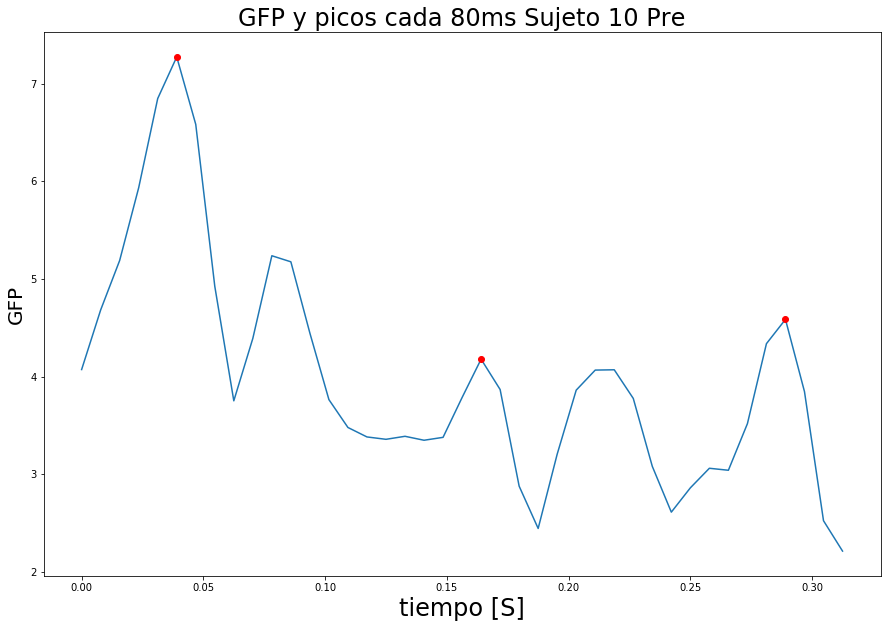

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 41)


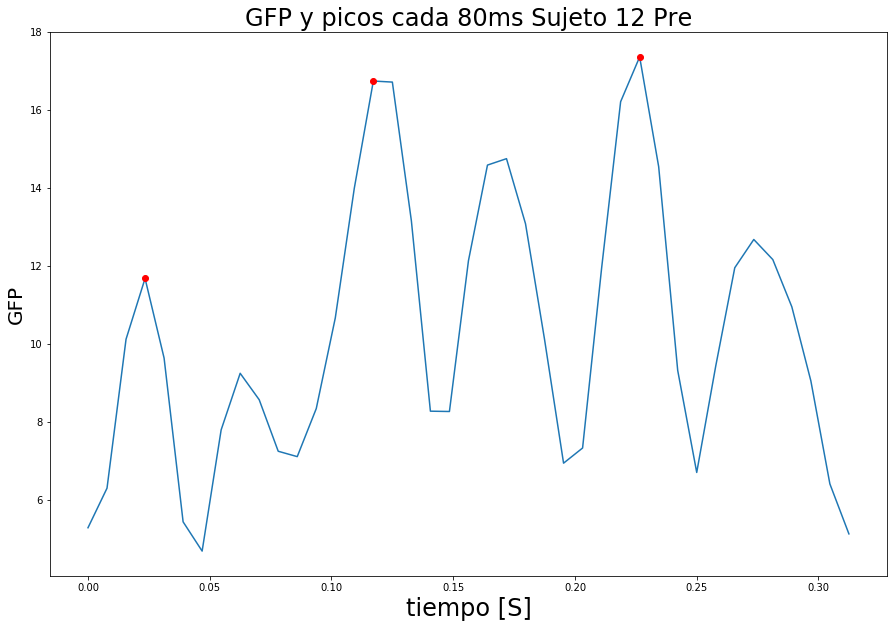

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 41)


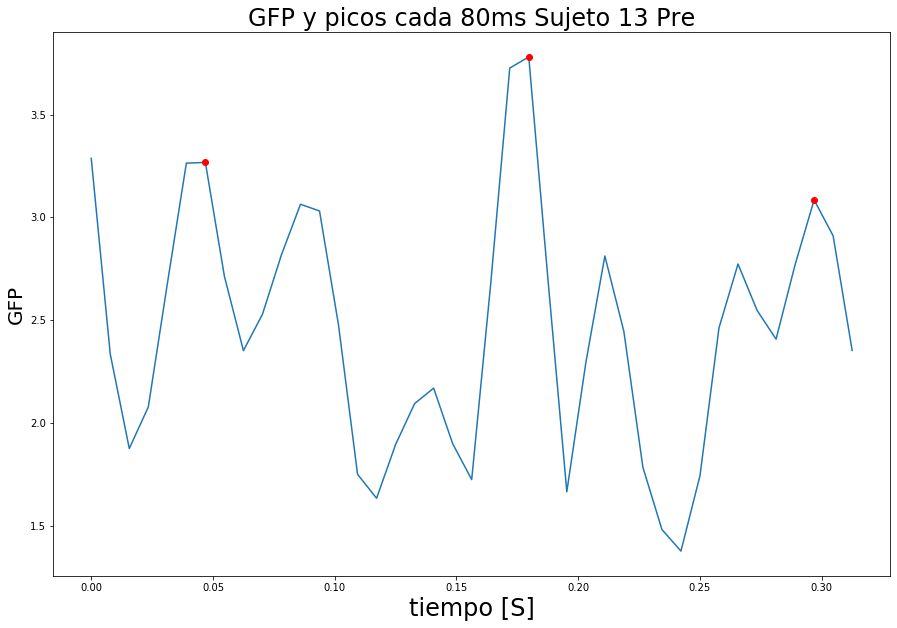

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 41)


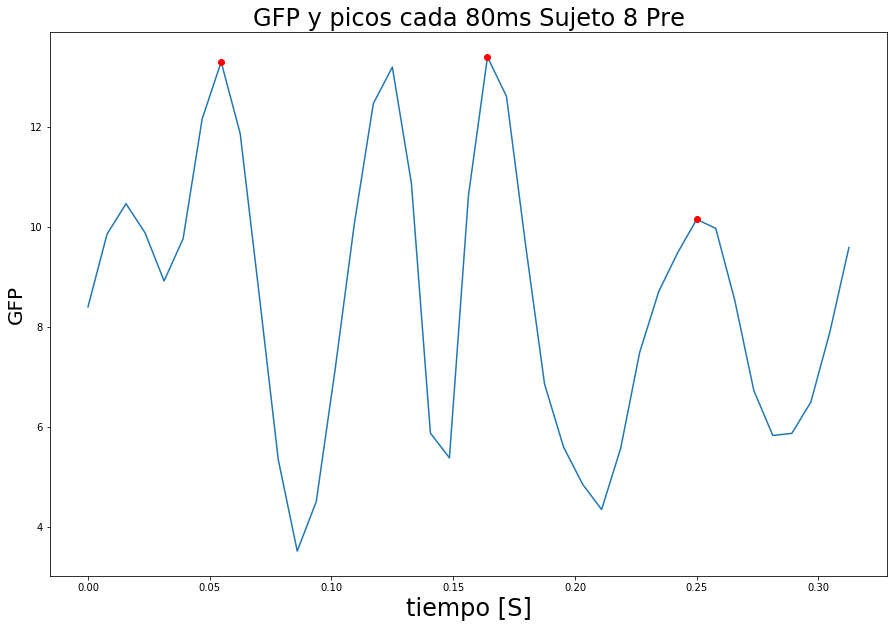

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 41)


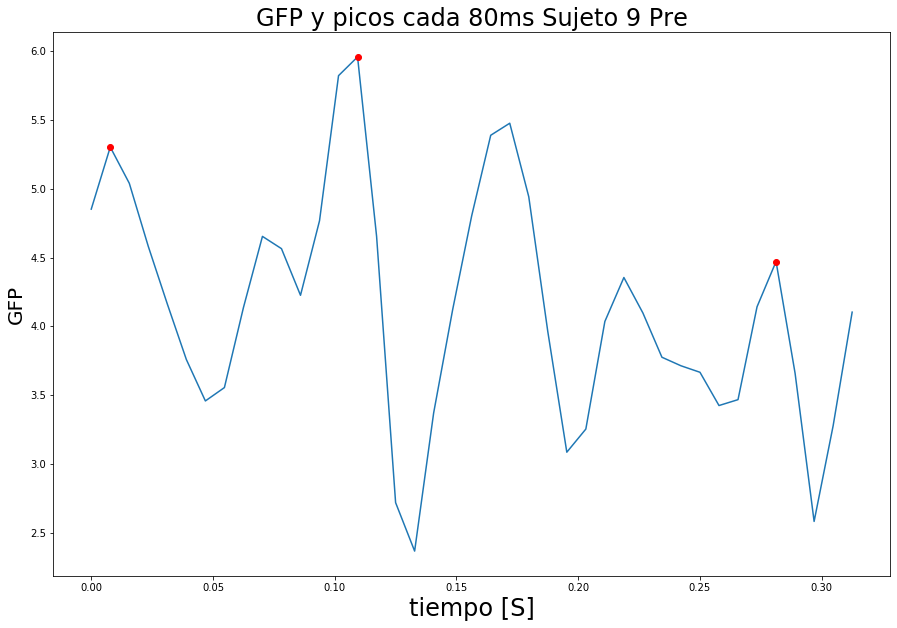

In [43]:
for i in range(0,len(filenames),2):
    print(f'Analizando el archivo {file}\n\n')
    
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i])
    sujeto = filenames[i].split("_")[1]
    print(f'Gráfica GFP de {file} \n')
    df = pd.DataFrame(eeg_data)
    df = df.loc[:,:40]
    print(df.shape)
    
    plt.figure(figsize=(15,10))
    gfp = df.std(ddof=0)
    s_rate = 128
    start=0
    end=60
    #x_ticks = np.arange(start * s_rate, (end + 1) * s_rate, s_rate)/256
    x = np.arange(0,df.shape[1])/128
    #y = gfp.
    plt.plot(x,gfp.values)
    plt.xlabel('tiempo [S]', fontsize=24)
    plt.ylabel('GFP', fontsize=20)
    plt.title(f'GFP y picos cada 80ms Sujeto {sujeto} Pre', fontsize=24)
    peaks, _ = find_peaks(gfp,height=(0,np.inf),distance=10)
    for ind in peaks:
        plt.plot(x[ind],gfp[ind],'ro')
    
    #plt.savefig(f'../images/grafico_GFP_sujeto_{sujeto}_pre')
    plt.show()
  

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 7681)


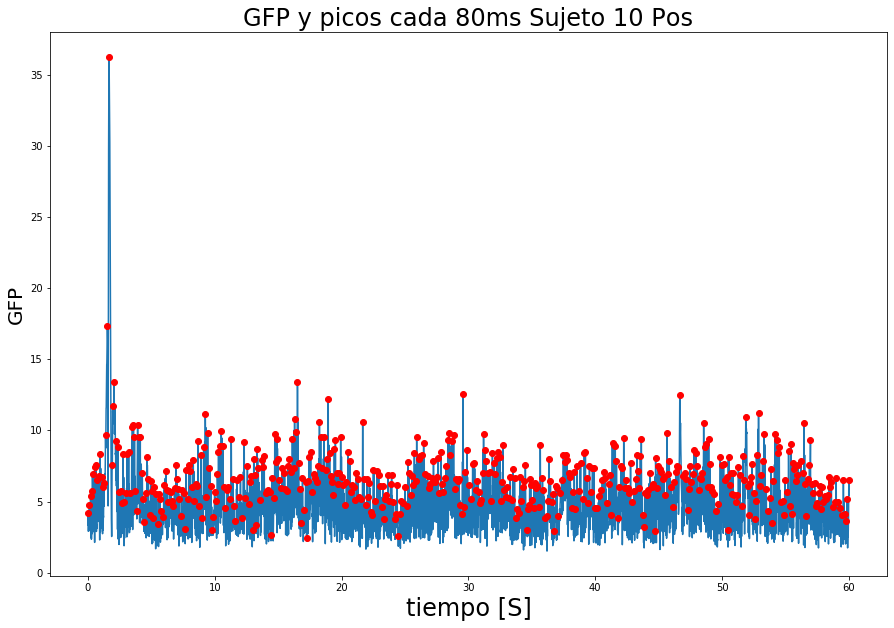

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 7681)


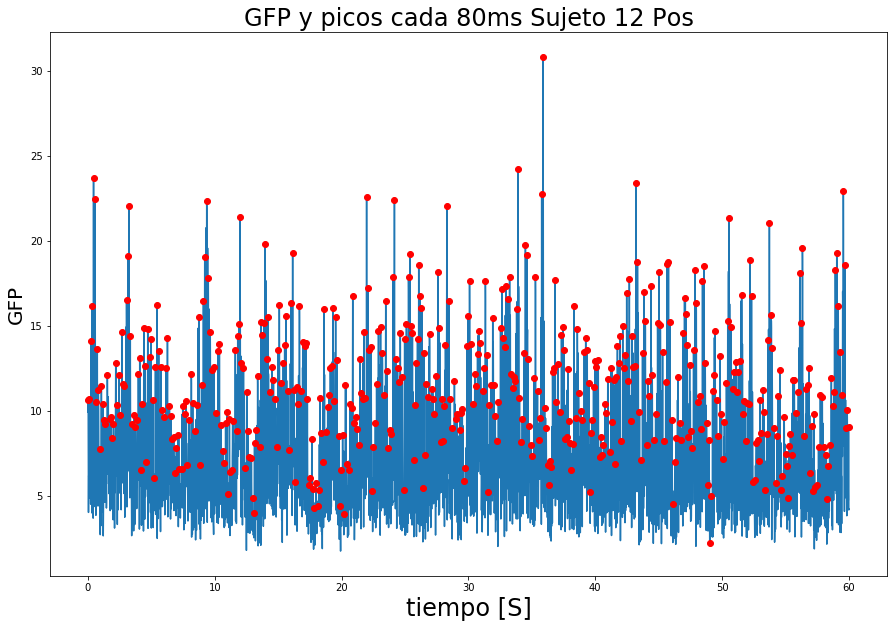

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 7681)


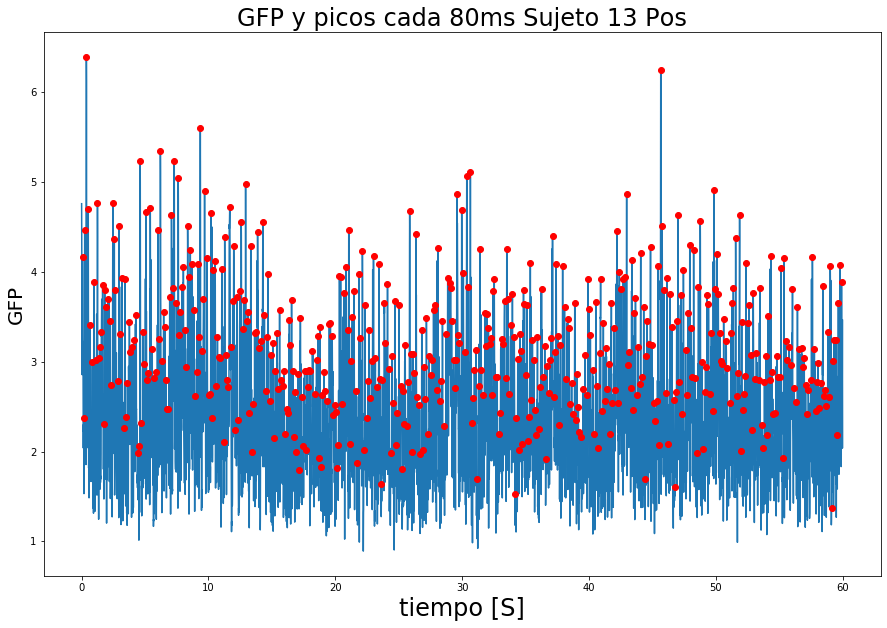

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 7681)


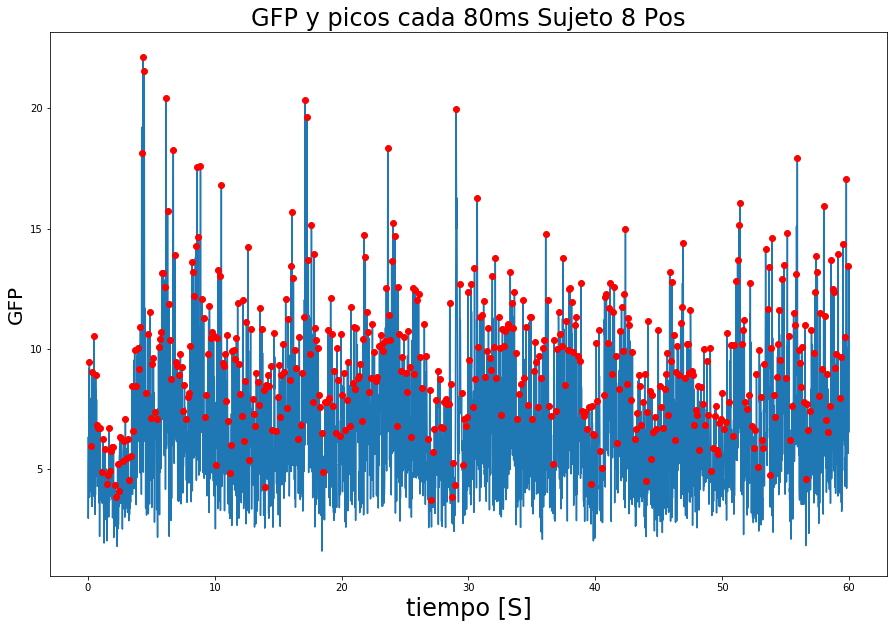

Analizando el archivo suj_10_bl_2.txt


Gráfica GFP de suj_10_bl_2.txt 

(30, 7681)


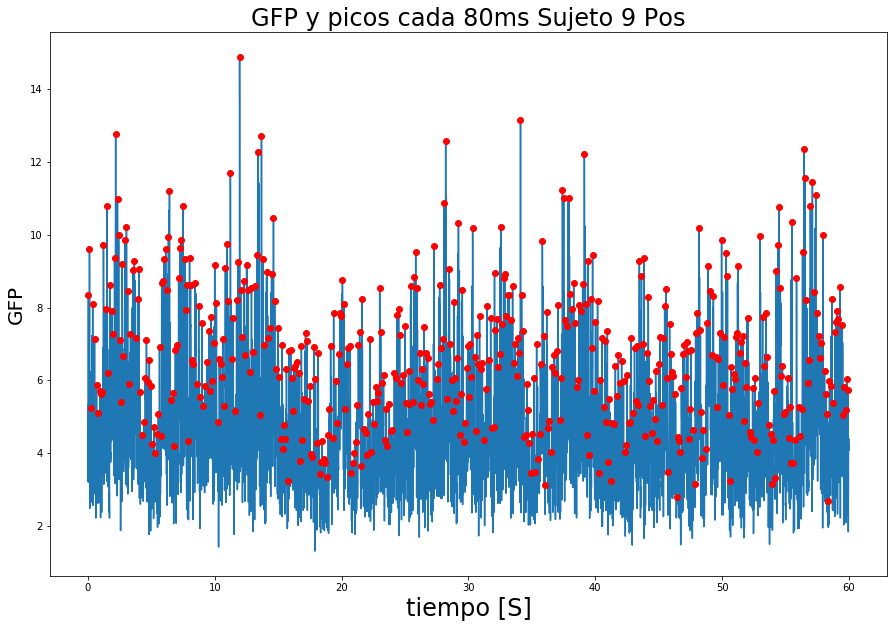

In [45]:
for i in range(0,len(filenames),2):
    print(f'Analizando el archivo {file}\n\n')
    
    eeg_data, s_rate, n_channels, n_samples = get_egg_data(foldername + filenames[i+1])
    sujeto = filenames[i].split("_")[1]
    print(f'Gráfica GFP de {file} \n')
    df = pd.DataFrame(eeg_data)
    df = df.loc[:,:]
    print(df.shape)
    
    plt.figure(figsize=(15,10))
    gfp = df.std(ddof=0)
    s_rate = 128
    start=0
    end=60
    #x_ticks = np.arange(start * s_rate, (end + 1) * s_rate, s_rate)/256
    x = np.arange(0,df.shape[1])/128
    #y = gfp.
    plt.plot(x,gfp.values)
    plt.xlabel('tiempo [S]', fontsize=24)
    plt.ylabel('GFP', fontsize=20)
    plt.title(f'GFP y picos cada 80ms Sujeto {sujeto} Pos', fontsize=24)
    peaks, _ = find_peaks(gfp,height=(0,np.inf),distance=10)
    for ind in peaks:
        plt.plot(x[ind],gfp[ind],'ro')
    
    plt.savefig(f'../images/grafico_GFP_sujeto_{sujeto}_pos')
    plt.show()

In [20]:
x_ticks

array([   0,  256,  512,  768, 1024, 1280, 1536, 1792, 2048, 2304, 2560,
       2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864, 5120, 5376,
       5632, 5888, 6144, 6400, 6656, 6912, 7168, 7424, 7680])

In [21]:
peaks, _ = find_peaks(df.std())

In [23]:
peaks.shape

(1420,)

In [26]:
df.std()[3]

8.246005414051181